In [6]:
# Filepaths, numpy, and Tensorflow
import os

import numpy as np
np.random.seed(0)


In [8]:
# Load list of clouds in order
cwd_path = os.getcwd()
images_path = os.path.join(cwd_path, 'image_dataset/dataset')

# List the clouds in the dataset folder: 10 Clouds
list_clouds = [name for name in os.listdir(images_path)]
# list_clouds.remove('.DS_Store')
list_clouds.sort()
list_clouds

['altocumulus',
 'altostratus',
 'cirrocumulus',
 'cirrostratus',
 'cirrus',
 'cumulonimbus',
 'cumulus',
 'nimbostratus',
 'stratocumulus',
 'stratus',
 'unknown']

In [9]:
# Load numpy saved XY_train dataset
cwd_path = os.getcwd()
outfile_path = os.path.join(cwd_path, 'XY_train')

# Initialize numpy clouds data with all zeros
X = np.zeros((1,224,224,3))
y = np.zeros((1,1))

# Merge all cloud datasets in X, y
for cloud in list_clouds:
    temp_X = np.load(os.path.join(outfile_path, f"{cloud}_X.npy"))
    temp_y = np.load(os.path.join(outfile_path, f"{cloud}_y.npy"))
    X = np.append(X, temp_X, axis=0)
    y = np.append(y, temp_y, axis=0)
    

In [10]:
# Peek at X, y shapes
print(X.shape)
print(y.shape)

(3066, 224, 224, 3)
(3066, 1)


In [11]:
# split 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Using TensorFlow backend.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# (1) Importing dependency
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

# (2) Get Data
# Done above cell

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(11))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
__________

In [8]:
%%time
# (5) Train
model.fit(
    X_train,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 124s - loss: 2.8012 - acc: 0.2323
Epoch 2/50
 - 106s - loss: 2.2347 - acc: 0.2993
Epoch 3/50
 - 106s - loss: 2.1294 - acc: 0.3080
Epoch 4/50
 - 105s - loss: 1.9475 - acc: 0.3658
Epoch 5/50
 - 105s - loss: 1.8588 - acc: 0.3710
Epoch 6/50
 - 103s - loss: 1.7655 - acc: 0.3889
Epoch 7/50
 - 103s - loss: 1.7623 - acc: 0.3971
Epoch 8/50
 - 102s - loss: 1.6712 - acc: 0.4245
Epoch 9/50
 - 103s - loss: 1.6475 - acc: 0.4328
Epoch 10/50
 - 102s - loss: 1.5843 - acc: 0.4298
Epoch 11/50
 - 102s - loss: 1.5006 - acc: 0.4672
Epoch 12/50
 - 457s - loss: 1.4308 - acc: 0.4976
Epoch 13/50
 - 111s - loss: 1.4170 - acc: 0.4972
Epoch 14/50
 - 105s - loss: 1.3891 - acc: 0.5150
Epoch 15/50
 - 111s - loss: 1.3144 - acc: 0.5259
Epoch 16/50
 - 113s - loss: 1.3370 - acc: 0.5302
Epoch 17/50
 - 107s - loss: 1.3064 - acc: 0.5268
Epoch 18/50
 - 107s - loss: 1.1750 - acc: 0.5881
Epoch 19/50
 - 107s - loss: 1.1609 - acc: 0.5863
Epoch 20/50
 - 107s - loss: 1.1522 - acc: 0.5850
Epoch 21/50
 - 108s - loss: 1

In [4]:
# Save the model
from keras.models import load_model

cwd_path = os.getcwd()
model_path = os.path.join(cwd_path, 'trained_models/iResV2_trained.h5')

model = load_model(model_path)

In [5]:
# Test predictions
encoded_predictions = model.predict(X_test[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

NameError: name 'X_test' is not defined

In [10]:
# Test predictions
encoded_predictions = model.predict_classes(X_test[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

# predictions = model.predict_classes(X_test[:5])
# y_test[:5]

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(encoded_y_train[:5])}")

Predicted classes: [4. 6. 6. 0. 6.]
Actual Labels: [3, 1, 3, 2, 6]


In [12]:
# Evaluating the loaded model
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"AlexNet - Loss: {model_loss}, Accuracy: {model_accuracy}")

AlexNet - Loss: 2.082758757095138, Accuracy: 0.559322033393181


In [13]:
ix_img = 10
img = X_test[ix_img].reshape(1,224,224,3)

# Test image
predict = np.argmax(model.predict(img))

print("actual target: ", list_clouds[encoded_y_train[ix_img]])
print("predict target: ", list_clouds[predict])

actual target:  cumulonimbus
predict target:  altostratus


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


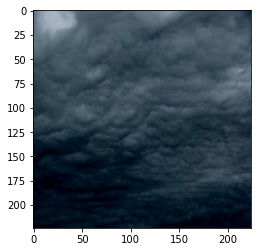

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(X_test[ix_img])